In [1]:
import os
import pickle
import numpy as np




def cache(cache_path, fn, *args, **kwargs):
    

    # If the cache-file exists.
    if os.path.exists(cache_path):
        # Load the cached data from the file.
        with open(cache_path, mode='rb') as file:
            obj = pickle.load(file)

        print("- Data loaded from cache-file: " + cache_path)
    else:
        # The cache-file does not exist.

        # Call the function / class-init with the supplied arguments.
        obj = fn(*args, **kwargs)

        # Save the data to a cache-file.
        with open(cache_path, mode='wb') as file:
            pickle.dump(obj, file)

        print("- Data saved to cache-file: " + cache_path)

    return obj


In [ ]:
from tensorflow import keras
print(keras.__version__)

2.4.0


In [2]:
import json
import os






data_dir = "/content/gdrive/My Drive/coco/"

# Sub-directories for the training- and validation-sets.

val_dir = "/content/gdrive/My Drive/coco/val2014/"
train_dir="/content/gdrive/My Drive/coco/train2014/"

# Base-URL for the data-sets on the internet.
data_url = "http://images.cocodataset.org/"


########################################################################


def _load_records(train=False):
    """
    Load the image-filenames and captions
    for either the training-set or the validation-set.
    """

    if train:
        # Training-set.
        filename = "captions_train2014.json"
    else:
        # Validation-set.
        filename = "captions_val2014.json"

    # Full path for the data-file.
    path = os.path.join(data_dir, "annotations", filename)

    # Load the file.
    with open(path, "r", encoding="utf-8") as file:
        data_raw = json.load(file)

    # Convenience variables.
    images = data_raw['images']
    annotations = data_raw['annotations']

    # Initialize the dict for holding our data.
    # The lookup-key is the image-id.
    records = dict()

    # Collect all the filenames for the images.
    for image in images:
        # Get the id and filename for this image.
        image_id = image['id']
        filename = image['file_name']

        # Initialize a new data-record.
        record = dict()

        # Set the image-filename in the data-record.
        record['filename'] = filename

        # Initialize an empty list of image-captions
        # which will be filled further below.
        record['captions'] = list()

        # Save the record using the the image-id as the lookup-key.
        records[image_id] = record

    # Collect all the captions for the images.
    for ann in annotations:
        # Get the id and caption for an image.
        image_id = ann['image_id']
        caption = ann['caption']

        # Lookup the data-record for this image-id.
        # This data-record should already exist from the loop above.
        record = records[image_id]

        # Append the current caption to the list of captions in the
        # data-record that was initialized in the loop above.
        record['captions'].append(caption)

    # Convert the records-dict to a list of tuples.
    records_list = [(key, record['filename'], record['captions'])
                    for key, record in sorted(records.items())]

    # Convert the list of tuples to separate tuples with the data.
    ids, filenames, captions = zip(*records_list)

    return ids, filenames, captions







def load_records(train=False):
  

    if train:
        # Cache-file for the training-set data.
        cache_filename = "records_train.pkl"
    else:
        # Cache-file for the validation-set data.
        cache_filename = "records_val.pkl"

    # Path for the cache-file.
    cache_path = os.path.join(data_dir, cache_filename)

    # If the data-records already exist in a cache-file then load it,
    # otherwise call the _load_records() function and save its
    # return-values to the cache-file so it can be loaded the next time.
    records = cache(cache_path=cache_path,
                    fn=_load_records,
                    train=train)

    return records

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Getting the names of images in directory. images are loaded based on their names

initially the names were taken using os.listdir().using this command is compute heavy.
So after loading, it was stored as a .pickle file for easy loading



In [ ]:
name=os.listdir('/content/gdrive/My Drive/coco/val2014')

In [4]:
 with open(os.path.join(data_dir, "val_names2014.pickle"), mode='rb') as file:
            name = pickle.load(file)

In [ ]:
name

['COCO_val2014_000000306135.jpg',
 'COCO_val2014_000000533511.jpg',
 'COCO_val2014_000000258023.jpg',
 'COCO_val2014_000000551811.jpg',
 'COCO_val2014_000000083476.jpg',
 'COCO_val2014_000000017776.jpg',
 'COCO_val2014_000000103488.jpg',
 'COCO_val2014_000000543300.jpg',
 'COCO_val2014_000000476298.jpg',
 'COCO_val2014_000000007281.jpg',
 'COCO_val2014_000000307292.jpg',
 'COCO_val2014_000000502279.jpg',
 'COCO_val2014_000000453731.jpg',
 'COCO_val2014_000000436559.jpg',
 'COCO_val2014_000000203846.jpg',
 'COCO_val2014_000000522446.jpg',
 'COCO_val2014_000000286458.jpg',
 'COCO_val2014_000000131800.jpg',
 'COCO_val2014_000000091612.jpg',
 'COCO_val2014_000000010526.jpg',
 'COCO_val2014_000000404923.jpg',
 'COCO_val2014_000000066700.jpg',
 'COCO_val2014_000000479149.jpg',
 'COCO_val2014_000000008080.jpg',
 'COCO_val2014_000000269511.jpg',
 'COCO_val2014_000000093393.jpg',
 'COCO_val2014_000000480408.jpg',
 'COCO_val2014_000000467956.jpg',
 'COCO_val2014_000000033835.jpg',
 'COCO_val2014

The caption for each file should be loaded. train=False implies validation set

In [5]:
_,filename_train,caption_train=load_records(train=False)

- Data loaded from cache-file: /content/gdrive/My Drive/coco/records_val.pkl


In [6]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

Loading the preprocessed images by the VGG16 model.This is a compute heavy process, so it was done separately to avoid colab timeouts and saved as a .pickle file

In [7]:
with open(os.path.join(data_dir, "transfer_values_vayya1.pickle"), mode='rb') as file:
            transfer_values_val = pickle.load(file)
transfer_values_val.shape

(15739, 4096)

loading the captions and tokenizer files
The tokenizer should be saved after initial execution and loaded from drive for further tuning to avoid change in indexes of words



In [8]:
with open(os.path.join(data_dir, "caption_sos.pickle"), mode='rb') as file:
            captions = pickle.load(file)
with open(os.path.join(data_dir, "tokenizer.pickle"), mode='rb') as file:
            tokeniser = pickle.load(file)

one of my failed attempts

In [ ]:
caption_final=[]
temp=[]
count=0
for ele in name:
  index = filename_train.index(ele)
  temp.append('sos ' + caption_train[index][0] + ' eos')
  if count == 348:
    caption_final.append(temp)
    count = 0
    temp = []
  else:
    count+=1
if count != 0:
  caption_final.append(temp)
  index = filename_train.index(ele)
  caption_final.append('sos ' + caption_train[index][0] + ' eos')

ValueError: ignored

the input captions should be formatted. each image has more than one captions. out of that we have to select one. after that to each of the captions of an image, 'sos' and 'eos' should be added to the beginning and end respectively

In [9]:
caption_final=[]
for i,ele in enumerate(name):
   if ele not in filename_train:
     transfer_values_val=np.delete(transfer_values_val,i,axis=0)
     continue
   index = filename_train.index(ele)
   caption_final.append('sos ' + caption_train[index][0] + ' eos')

In [10]:
transfer_values_val.shape

(15732, 4096)

one type of tuning performed but unsuccesful

In [ ]:
maxi=0
for ele in transfer_values_val:
  maxi=max(maxi,max(ele))

In [11]:
transfer_values_val[0]

array([0.04767, 0.511  , 1.859  , ..., 0.     , 0.     , 0.3403 ],
      dtype=float16)

In [ ]:
maxi

4.645

In [ ]:
for i,ele in enumerate(transfer_values_val):
  transfer_values_val[i]=ele/maxi

In [ ]:
transfer_values_val[0]

array([0.04767, 0.511  , 1.859  , ..., 0.     , 0.     , 0.3403 ],
      dtype=float16)

In [ ]:
len(caption_final)

15732

converting word to tokens and padding it

In [12]:
sequence=tokeniser.texts_to_sequences(caption_final)
padded=pad_sequences(sequence,maxlen=15,padding='post',truncating='post')

  
  
  

time delaying the input to make it the output

In [13]:
decoder_input = padded[:,0:-1]
decoder_output = padded[:,1:]

In [14]:
decoder_input.shape

(15732, 14)

In [15]:
def Generator():  
  x_data={'decoders_input':decoder_input,
          'transfer_values_input':transfer_values_val
          }
  y_data={'decoders_op':decoder_output}
  return x_data,y_data
x_train,y_train=Generator()

In [ ]:
print(x_train['decoders_input'].shape)
print(x_train['transfer_values_input'].shape)

(15732, 14)
(15732, 4096)


In [ ]:
y_train['decoders_op'][0]

array([  6,  11,  10,  54,  34,   6, 870,  38,   1, 107,   9, 931, 491,
         3], dtype=int32)

preparing the captions and preprocessed images

In [ ]:
def get_random_caption_tokens(idx):
  result=[]
  for i in idx:
    j=np.random.choice(len(sequence_final[i]))
    tokens=sequence_final[i][j]
    result.append(tokens)
  return result

In [ ]:
def batch_generator(batch_size):
  while True:
    idx=np.random.randint(len(name),size=batch_size)
    transfer_values =  transfer_values_val[idx]
    tokens = get_random_caption_tokens(idx)
    num_tokens = [len(t) for t in tokens]
    max_tokens=np.max(num_tokens)
    tokens_padded = pad_sequences(tokens,maxlen=max_tokens, padding='post',truncating='post')
    decoder_input_data = tokens_padded[:, 0:-1]
    decoder_output_data = tokens_padded[:, 1:]
    x_data = \
    {
        'decoders_input':decoder_input_data,
        'transfer_values_input': transfer_values
    }
    y_data = \
    {
        'decoders_op':decoder_output_data
    }
    yield (x_data, y_data)

In [ ]:
batch_size = 384
generator = batch_generator(batch_size=batch_size)

NameError: ignored

In [ ]:
batch_x,batch_y=next(generator)
print(batch_x['decoders_input'][0])
print(batch_y['decoders_op'][0])

NameError: ignored

In [ ]:
steps_per_epoch = 1541
num_words=len(tokeniser.word_index)

In [ ]:
transfer_values_input = keras.layers.Input(shape=(4096,),
                              name='transfer_values_input')

decoder_transfer_map = keras.layers.Dense(512,
                             activation='tanh',
                             name='decoder_transfer_map')

decoders_input = keras.layers.Input(shape=(None, ), name='decoders_input')
decoder_embedding = keras.layers.Embedding(input_dim=num_words+1,
                              output_dim=128,
                              name='decoder_embedding')

decoder_LSTM1 = keras.layers.GRU(512, name='decoder_gru1',
                   return_sequences=True)
decoder_LSTM2 = keras.layers.GRU(512, name='decoder_gru2',
                   return_sequences=True)
decoder_LSTM3 = keras.layers.GRU(512, name='decoder_gru3',
                   return_sequences=True)

decoder_dense=keras.layers.Dense(num_words+1,activation='softmax',name='decoders_op')

In [ ]:
def connect_decoder(transfer_values_input):
    
    initial_state = decoder_transfer_map(transfer_values_input)
    '''initial_state = keras.layers.Dropout(0.4)(initial_state)'''
    

    # Start the decoder-network with its input-layer.
    net = decoders_input
    
    # Connect the embedding-layer.
    net = decoder_embedding(net)
    
    # Connect all the GRU layers.
    net = decoder_LSTM1(net, initial_state=initial_state)
    
    net = decoder_LSTM2(net, initial_state=initial_state)
    
    net = decoder_LSTM3(net, initial_state=initial_state)
    '''net = keras.layers.Dropout(0.4)(net)'''
    

    # Connect the final dense layer that converts to
    # one-hot encoded arrays.
    decoders_output = decoder_dense(net)
    
    return decoders_output

In [ ]:
transfer_values_input = keras.layers.Input(shape=(4096,),
                              name='transfer_values_input')

decoder_transfer_map = keras.layers.Dense(1024,
                             activation='tanh',
                             name='decoder_transfer_map')

decoders_input = keras.layers.Input(shape=(None, ), name='decoders_input')
decoder_embedding = keras.layers.Embedding(input_dim=num_words+1,
                              output_dim=128,
                              name='decoder_embedding')

decoder_LSTM1 = keras.layers.GRU(1024, name='decoder_gru1',
                   return_sequences=True)

decoder_LSTM2 = keras.layers.GRU(1024, name='decoder_gru2',
                   return_sequences=True)

decoder_LSTM3 = keras.layers.GRU(1024, name='decoder_gru3',
                   return_sequences=True)


decoder_dense=keras.layers.Dense(num_words+1,activation='softmax',name='decoders_op')

In [ ]:
decoder_LSTM3.output_shape

(None, None, 512)

In [ ]:
decoders_output = connect_decoder(transfer_values_input)

decoder_model = keras.Model(inputs=[transfer_values_input, decoders_input],
                      outputs=[decoders_output])

In [ ]:
decoder_model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),
                      loss='sparse_categorical_crossentropy')

In [ ]:
decoder_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoders_input (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
transfer_values_input (InputLay [(None, 4096)]       0                                            
__________________________________________________________________________________________________
decoder_embedding (Embedding)   (None, None, 128)    1523072     decoders_input[0][0]             
__________________________________________________________________________________________________
decoder_transfer_map (Dense)    (None, 512)          2097664     transfer_values_input[0][0]      
_______________________________________________________________________________________

In [ ]:
decoder_model.fit(x=x_train,
                  y=y_train,
                  
                  
                  epochs=60)
decoder_model.save_weights('/content/gdrive/My Drive/coco/decoder_model_weights_VGG16_notsure512nosteps',overwrite=True)

Epoch 1/60
492/492 [==============================] - 9s 18ms/step - loss: 3.6664
Epoch 2/60
492/492 [==============================] - 9s 18ms/step - loss: 2.9928
Epoch 3/60
492/492 [==============================] - 9s 18ms/step - loss: 2.7657
Epoch 4/60
492/492 [==============================] - 9s 18ms/step - loss: 2.6222
Epoch 5/60
492/492 [==============================] - 9s 19ms/step - loss: 2.5207
Epoch 6/60
492/492 [==============================] - 9s 19ms/step - loss: 2.4331
Epoch 7/60
492/492 [==============================] - 9s 19ms/step - loss: 2.3578
Epoch 8/60
492/492 [==============================] - 9s 19ms/step - loss: 2.2862
Epoch 9/60
492/492 [==============================] - 9s 19ms/step - loss: 2.2194
Epoch 10/60
492/492 [==============================] - 9s 19ms/step - loss: 2.1533
Epoch 11/60
492/492 [==============================] - 9s 19ms/step - loss: 2.0930
Epoch 12/60
492/492 [==============================] - 9s 19ms/step - loss: 2.0305
Epoch 13/60
4

In [ ]:
decoder_model.load_weights('/content/gdrive/My Drive/coco/decoder_model_weights_VGG16_notsure')

In [ ]:
decoder_model.save('/content/gdrive/My Drive/coco/decoder_model_final')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/coco/decoder_model_final/assets


In [16]:
decoder_model=keras.models.load_model('/content/gdrive/My Drive/coco/decoder_model_final')

In [17]:
from tensorflow import keras


In [ ]:
decoder_model.load_weights('/content/gdrive/My Drive/coco/decoder_model_weights_VGG16_finese')

In [ ]:
from keras.applications import VGG16
base_model=VGG16(weights='imagenet',include_top=True)
for layers in base_model.layers:
  layers.trainable=False
last_layer=base_model.layers[-2]
last_output=last_layer.output

img_model=keras.Model(base_model.input,last_output)
img_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

TESTING PHASE


In [ ]:
img_model.save('/content/gdrive/My Drive/coco/VGG16final1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/coco/VGG16final/assets


In [18]:
img_model=keras.models.load_model('/content/gdrive/My Drive/coco/VGG16final')

In [ ]:
COCO_val2014_000000000641.jpg
COCO_val2014_000000000827.jpg
COCO_val2014_000000000397.jpg
COCO_val2014_000000001149.jpg

In [29]:
img=Image.open('/content/gdrive/My Drive/coco/Field-green-tea-Mount-Fuji-Shizuoka-prefecture.jpg')
 
img=img.resize(size=(224,224), resample=Image.LANCZOS)
image=np.array(img)

image_batch = np.expand_dims(image, axis=0)
print(image_batch.shape)
print(image.shape)

(1, 224, 224, 3)
(224, 224, 3)


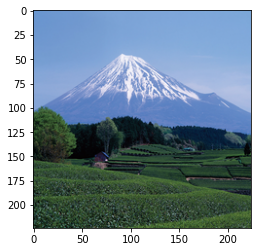

In [30]:
plt.imshow(img)

In [31]:
transfered_values = img_model.predict(image_batch)

In [ ]:
transfered_values[0]=transfered_values[0]/maxi

In [ ]:
transfered_values

array([[0.270189 , 0.       , 0.       , ..., 0.       , 3.0208511,
        0.2267344]], dtype=float32)

In [ ]:
transfered_values

array([[0.270189 , 0.       , 0.       , ..., 0.       , 3.0208511,
        0.2267344]], dtype=float32)

In [32]:
start_word=tokeniser.word_index['sos']
end_word=tokeniser.word_index['eos']
corpus_index=tokeniser.word_index
corpus_index={value:key for key,value in corpus_index.items()}
reverse_corpus_index={value:key for key,value in corpus_index.items()}
reverse_corpus_index['man']

11

In [25]:
start_word

2

In [ ]:
def sample(preds,temperature=1.0):
  preds =np.asarray(preds).astype('float64')
  preds=np.log(preds)/temperature
  exp_preds=np.exp(preds)
  preds=exp_preds/np.sum(exp_preds)
  
  
  '''preds=preds.reshape(preds.shape[1])'''
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

In [33]:
decode_input=np.zeros(shape=(1,30),dtype=np.int)

curr_token=start_word
count_tokens=0
max_token=30
output_text = ''
i=0
while curr_token!=end_word and count_tokens<max_token:
  
  decode_input[0,count_tokens]=curr_token
  x_data={
      'decoders_input': decode_input,
      'transfer_values_input': transfered_values
      
  }
  decode_output = decoder_model.predict(x_data)
  token_output=decode_output[0,count_tokens,:]
  pred=np.argmax(token_output)
  '''if pred == 11:
    token_output=np.delete(token_output,pred)
    pred=np.argmax(token_output)'''

  
  curr_token=pred
  print(pred)
  sampled_word = corpus_index[pred]
  count_tokens += 1
  '''if i == 0:
    temp=curr_token
  if i<4:
    i+=1
    curr_token=start_word
    continue'''
  output_text += " " + sampled_word

1
50
145
176
13
20
12
1
171
3


In [34]:
token_output

array([7.8097102e-09, 5.8168534e-04, 4.5168136e-08, ..., 4.5077421e-08,
       4.5239698e-08, 4.2728541e-08], dtype=float32)

In [35]:
output_text

' a red fire hydrant sitting next to a sandwich eos'